In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger

import gans
from gans import CGAN, MNISTDataModule

In [3]:
# define the logger object
logger = TensorBoardLogger("gans_logs", name = "CGAN")

dm = MNISTDataModule(batch_size=128)

model = CGAN()
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=70,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=logger,
    # check_val_every_n_epoch=5
)
trainer.fit(model, dm)

Epoch 69: 100%|██████████████████████████████████| 430/430 [18:01<00:00,  2.52s/it, loss=0.707, v_num=11, loss/g_loss=0.685, loss/d_loss=0.692]


In [4]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_grid = make_grid(fake[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


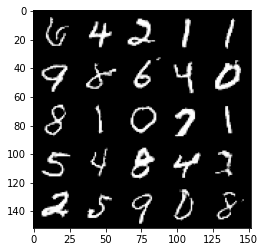

In [5]:
n_samples = 25
fake = model.on_validation_epoch_end(n_samples, labels=None)
show_tensor_images(fake, num_images=25, size=(1, 28, 28))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


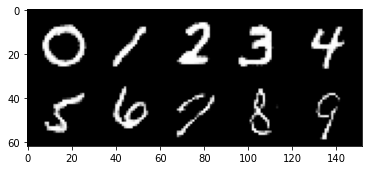

In [28]:
n_samples = 10
fake = model.on_validation_epoch_end(n_samples, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
show_tensor_images(fake, num_images=25, size=(1, 28, 28))

Changing the Class Vector
You can generate some numbers with your new model! You can add interpolation as well to make it more interesting.

So starting from a image, you will produce intermediate images that look more and more like the ending image until you get to the final image. Your're basically morphing one image into another. You can choose what these two images will be using your conditional GAN.

In [ ]:
# Start tensorboard.
os.environ['TENSORBOARD_BINARY'] = '/.../anaconda3/envs/pytorch/bin/tensorboard'
%load_ext tensorboard
%tensorboard --logdir gans_logs/ --port 8889 --bind_all